<a href="https://colab.research.google.com/github/adewumi96/-Exploratory-Data-Analysis-and-Data-Visualization/blob/main/Cousera_scenario_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data, explore, and extract the New York City TLC data with Python

In [ ]:
# Import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy.stats import zscore


In [ ]:
df=pd.read_csv('TaxiData.csv.zip')

In [ ]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [ ]:
df.size

408582

In [ ]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Clean the data to handle missing values, remove duplicates, and correct any inconsistencies.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
missing_values


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Using custom functions to organize the information within the New York City TLC dataset

In [ ]:
# Function to convert columns to appropriate data types
def convert_types(df):
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    return df

# Function to calculate trip duration in minutes
def calculate_trip_duration(df):
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    return df


Building a dataframe

In [ ]:
# Apply data type conversion
df = convert_types(df)

# Calculate trip duration
df = calculate_trip_duration(df)

# Drop rows with invalid trip durations
df = df[df['trip_duration'] > 0]


Performing EDA to generate summary statistics and visualizations to uncover patterns and insights.

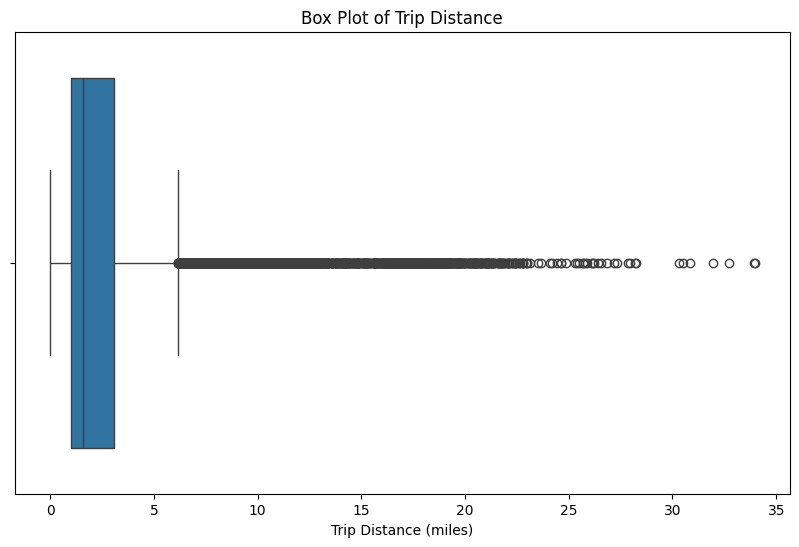

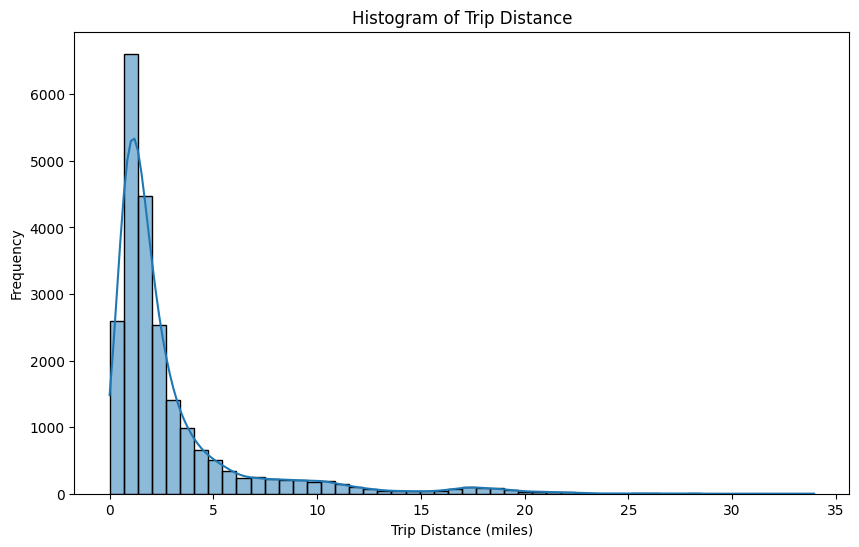

In [ ]:
# Box plot of trip_distance
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['trip_distance'])
plt.title('Box Plot of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.show()

# Histogram of trip_distance
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()


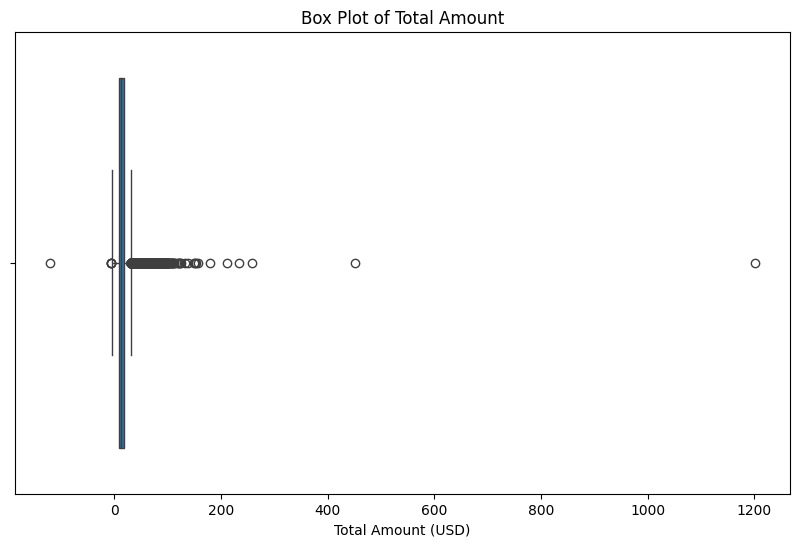

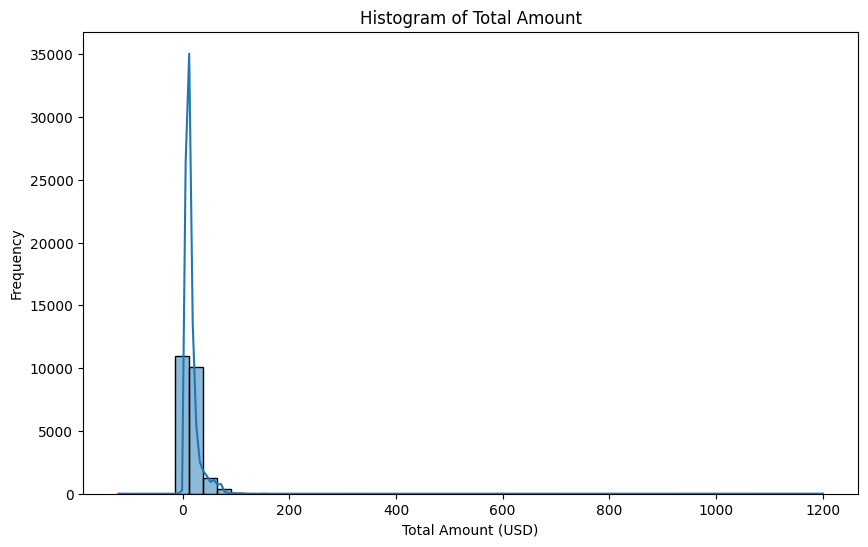

In [ ]:
# Box plot of total_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_amount'])
plt.title('Box Plot of Total Amount')
plt.xlabel('Total Amount (USD)')
plt.show()

# Histogram of total_amount
plt.figure(figsize=(10, 6))
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title('Histogram of Total Amount')
plt.xlabel('Total Amount (USD)')
plt.ylabel('Frequency')
plt.show()


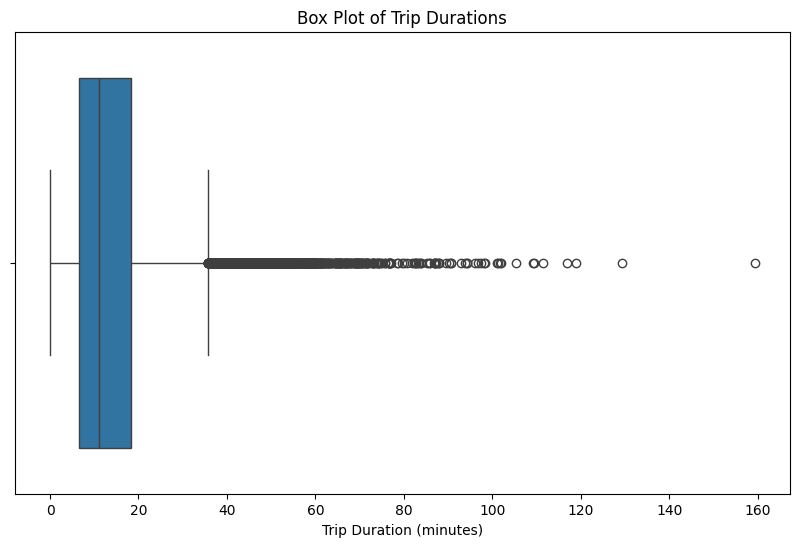

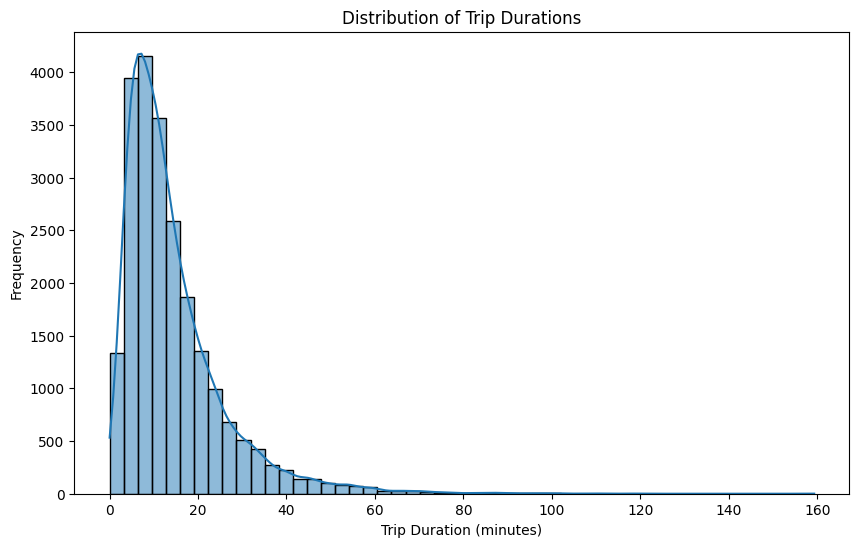

In [ ]:
# Summary statistics
summary_stats = df.describe()

# Display summary statistics
summary_stats

# Box plot of total_duration
plt.figure(figsize=(10, 6)56)
sns.boxplot(x=df['trip_duration'])
plt.title('Box Plot of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.show()

# Visualize trip duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()




Analyzing the distribution of trips across different hours of the day to identify peak hours.

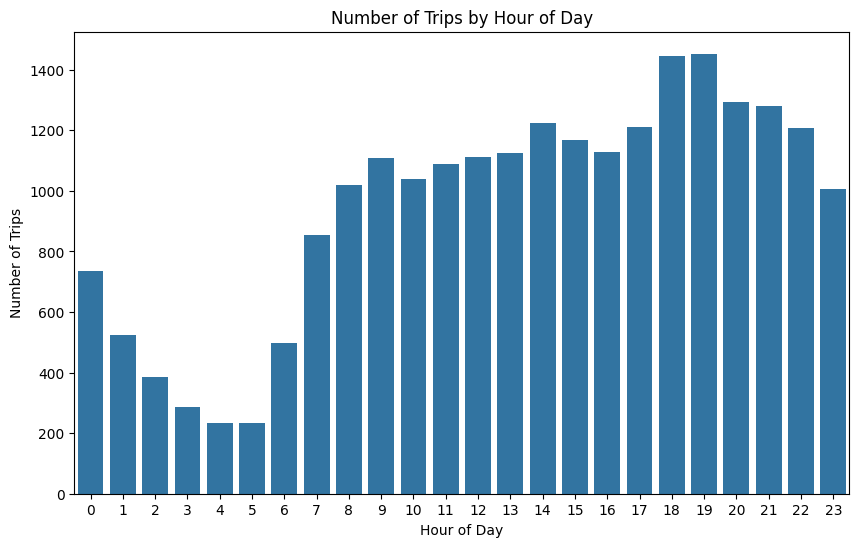

In [ ]:
# Hourly distribution of trips
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour

# Visualize trip count by hour of day
plt.figure(figsize=(10, 6))
sns.countplot(x=df['hour_of_day'])
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()


Analyzing trip durations at different times of the day to identify periods of high traffic congestion.

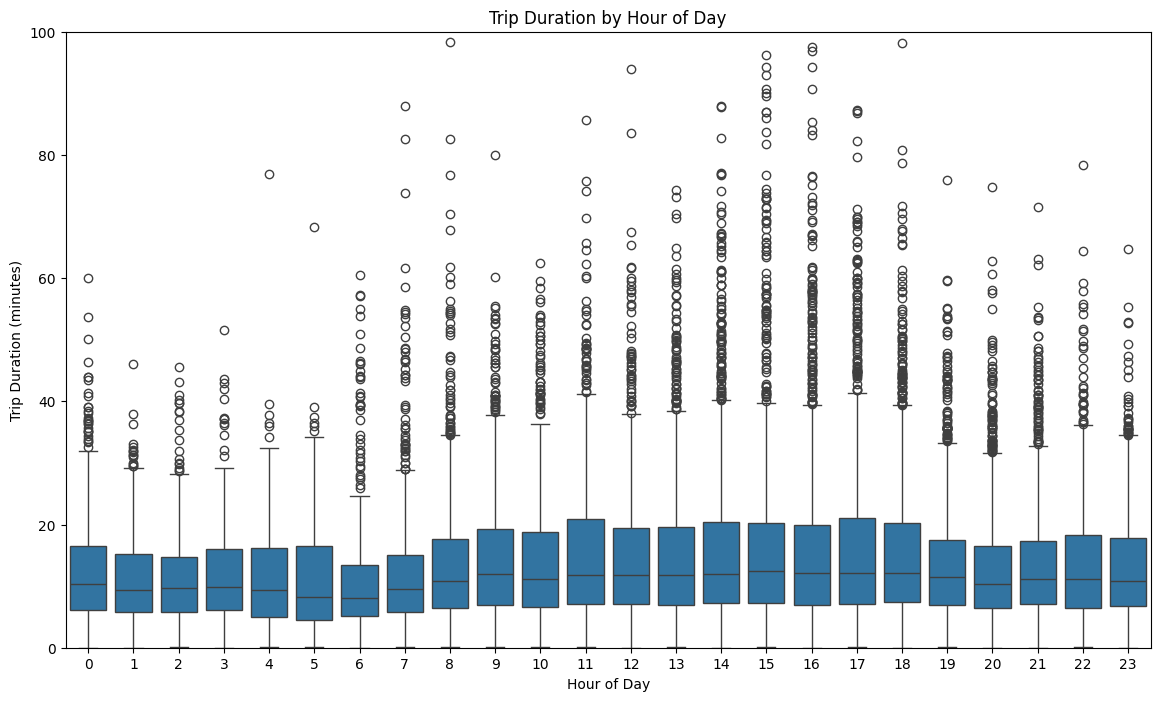

In [ ]:
# Box plot of trip duration by hour of day
plt.figure(figsize=(14, 8))
sns.boxplot(x='hour_of_day', y='trip_duration', data=df)
plt.title('Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Duration (minutes)')
plt.ylim(0, 100)  # Focus on a reasonable range of trip durations
plt.show()


Analyzing fare patterns to see if there are opportunities for pricing adjustments.

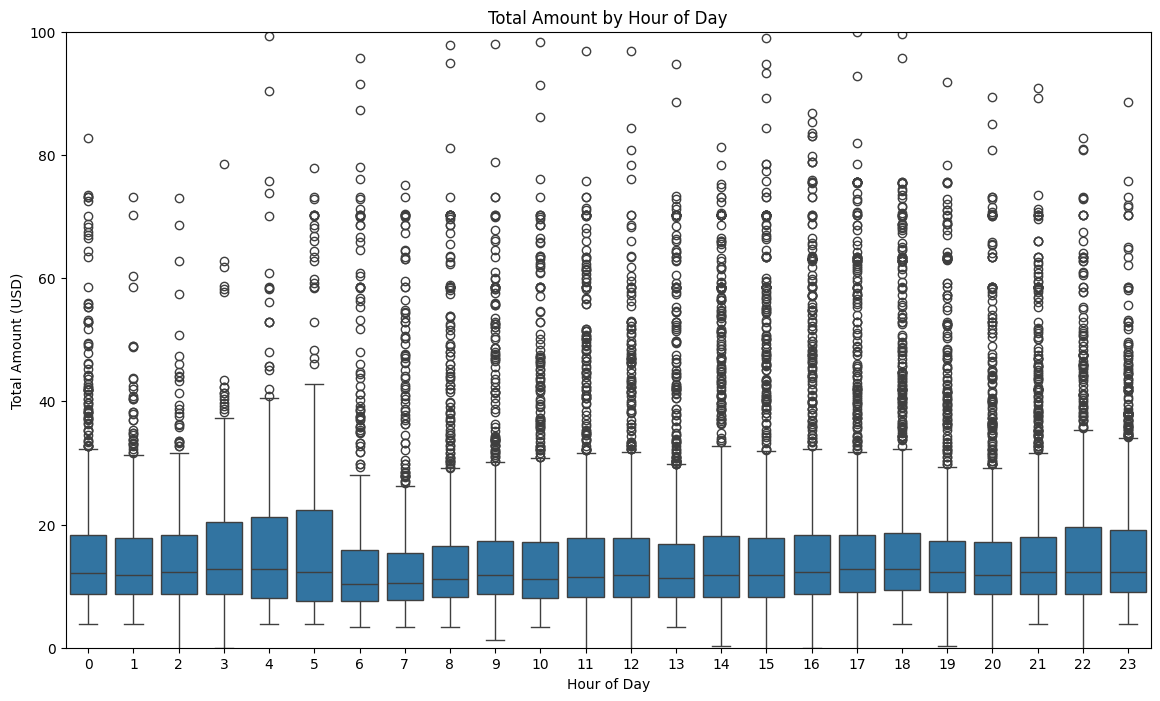

In [ ]:
# Box plot of total amount by hour of day
plt.figure(figsize=(14, 8))
sns.boxplot(x='hour_of_day', y='total_amount', data=df)
plt.title('Total Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Amount (USD)')
plt.ylim(0, 100)  # Focus on a reasonable range of total amounts
plt.show()


Mean Trip Distance by Drop-off Location

To understand which drop-off locations tend to have longer trips.

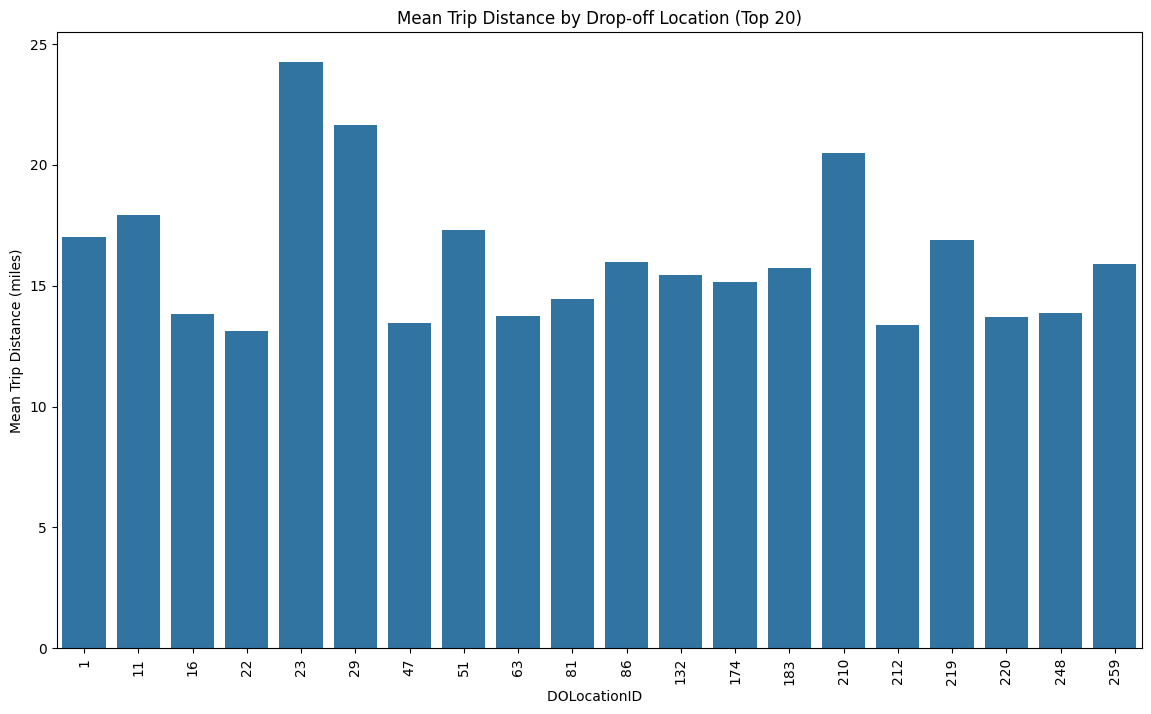

In [ ]:
# Calculate the mean trip distance for each drop-off location
mean_trip_distance_by_dropoff = df.groupby('DOLocationID')['trip_distance'].mean().reset_index()

# Sort the results in descending order by mean trip distance
mean_trip_distance_by_dropoff = mean_trip_distance_by_dropoff.sort_values(by='trip_distance', ascending=False)

# Create a bar plot of mean trip distances by drop-off location
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_trip_distance_by_dropoff.head(20), x='DOLocationID', y='trip_distance')
plt.title('Mean Trip Distance by Drop-off Location (Top 20)')
plt.xlabel('DOLocationID  ')
plt.ylabel('Mean Trip Distance (miles)')
plt.xticks(rotation=90)
plt.show()


 Certain drop-off locations have consistently higher mean trip distances as seen from the barplot above, which can be indicative of popular long-distance routes.


Understanding ride and revenue patterns by day of the week and month helps in strategic planning.

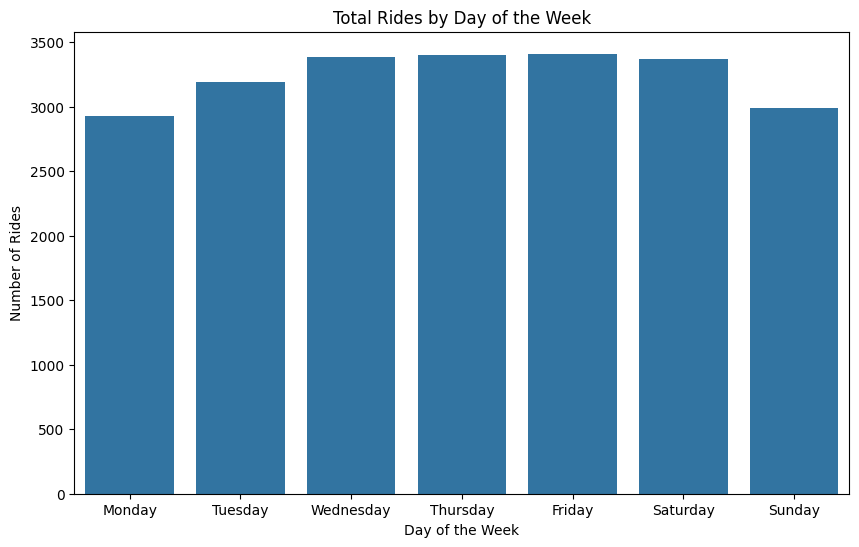

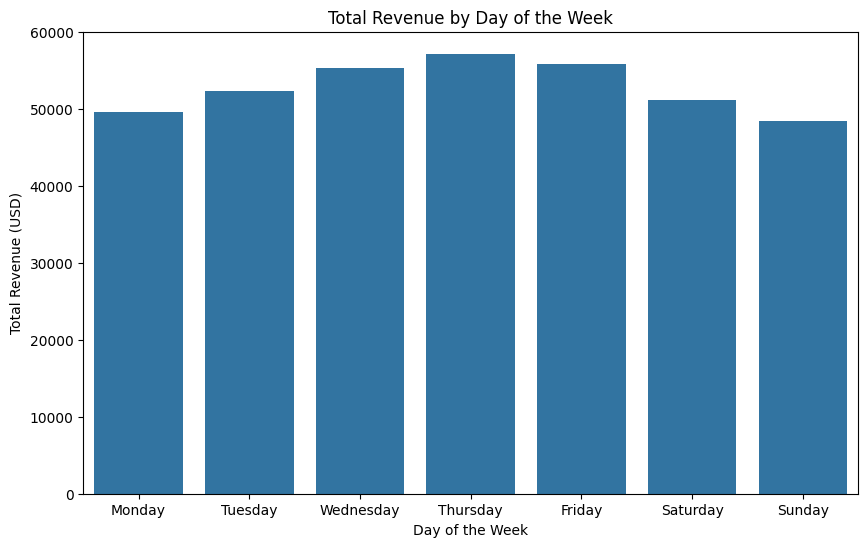

In [ ]:
# Total rides by day of the week
# Check if 'tpep_pickup_datetime' column exists before extracting day of the week
if 'tpep_pickup_datetime' in df.columns:
    df['day'] = df['tpep_pickup_datetime'].dt.day_name()
    rides_by_day = df['day'].value_counts().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

    plt.figure(figsize=(10, 6))
    sns.barplot(x=rides_by_day.index, y=rides_by_day.values)
    plt.title('Total Rides by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Rides')
    plt.show()
else:
    print("Column 'tpep_pickup_datetime' not found in DataFrame. Cannot calculate rides by day of the week.")

# Total revenue by day of the week
if 'day' in df.columns:
    revenue_by_day = df.groupby('day')['total_amount'].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

    plt.figure(figsize=(10, 6))
    sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values)
    plt.title('Total Revenue by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Revenue (USD)')
    plt.show()
else:
    print("Column 'day' not found in DataFrame. Cannot calculate revenue by day of the week.")


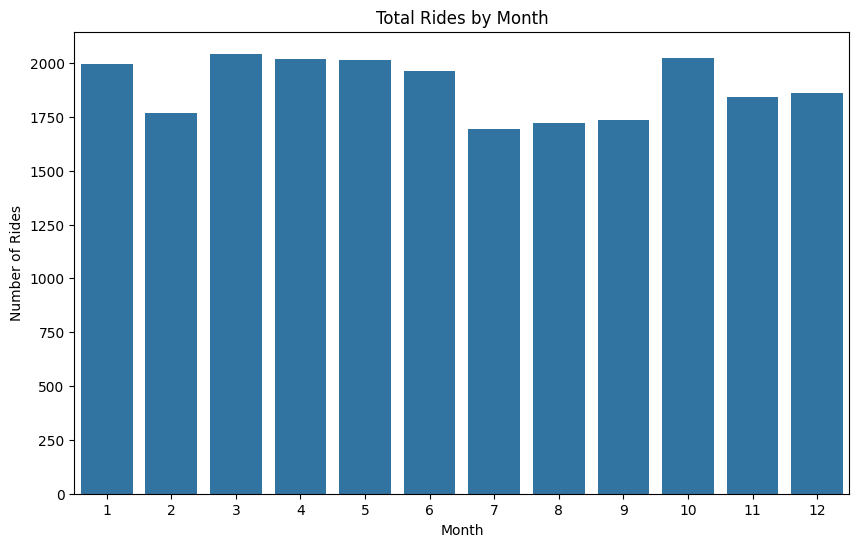

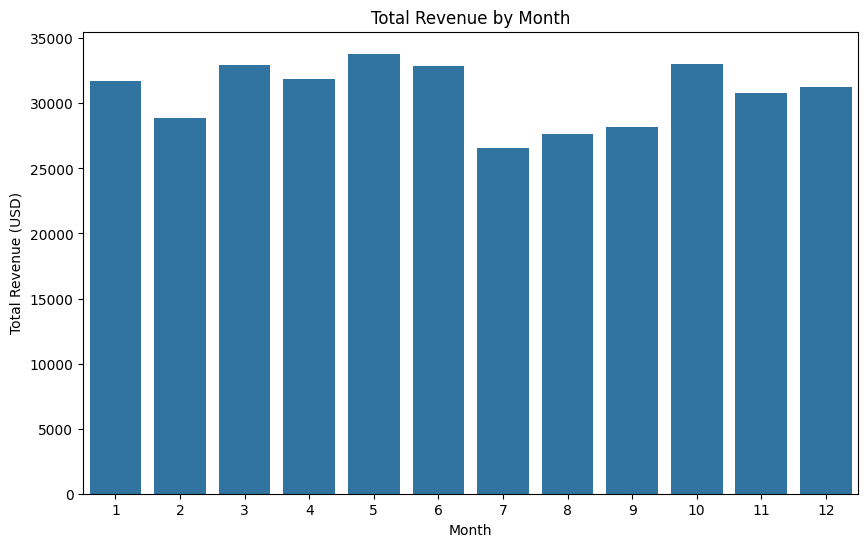

In [ ]:
# Extract month from 'tpep_pickup_datetime' if it exists
if 'tpep_pickup_datetime' in df.columns:
    df['month'] = df['tpep_pickup_datetime'].dt.month  # Extract month and create a new 'month' column

# Total rides by month
if 'month' in df.columns:
    rides_by_month = df['month'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=rides_by_month.index, y=rides_by_month.values)
    plt.title('Total Rides by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Rides')
    plt.show()
else:
    print("Column 'month' not found in DataFrame. Cannot calculate rides by month.")

# Total revenue by month
if 'month' in df.columns:
    revenue_by_month = df.groupby('month')['total_amount'].sum().sort_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=revenue_by_month.index, y=revenue_by_month.values)
    plt.title('Total Revenue by Month')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue (USD)')
    plt.show()
else:
    print("Column 'month' not found in DataFrame. Cannot calculate revenue by month.")

These analyses provide a comprehensive overview to improve operational efficiency and further understand fare patterns and spatial distributions. By visualizing these aspects, we can make data-driven decisions to enhance taxi operations and customer satisfaction.

Significant outliers are present in trip distance, total amount, and trip duration. Outliers can skew the analysis and lead to misleading insights. Here’s a proposed solution to handle outliers in the dataset:

Identification of Outliers:

Using box plots to visualize and identify outliers in trip distance, total amount, and trip duration and by Calculating the Z-scores for the relevant columns to identify data points that fall beyond the threshold (e.g., |Z| > 3).

In [ ]:
# Calculate Z-scores
df['trip_distance_zscore'] = zscore(df['trip_distance'])
df['total_amount_zscore'] = zscore(df['total_amount'])
df['trip_duration_zscore'] = zscore(df['trip_duration'])

# Identify outliers
distance_outliers = df[np.abs(df['trip_distance_zscore']) > 3]
amount_outliers = df[np.abs(df['total_amount_zscore']) > 3]
duration_outliers = df[np.abs(df['trip_duration_zscore']) > 3]


In [ ]:
# Remove outliers
df_cleaned = df[(np.abs(df['trip_distance_zscore']) <= 3) &
                (np.abs(df['total_amount_zscore']) <= 3) &
                (np.abs(df['trip_duration_zscore']) <= 3)]

# Cap outliers
df['trip_distance'] = np.where(np.abs(df['trip_distance_zscore']) > 3, df['trip_distance'].mean(), df['trip_distance'])
df['total_amount'] = np.where(np.abs(df['total_amount_zscore']) > 3, df['total_amount'].mean(), df['total_amount'])
df['trip_duration'] = np.where(np.abs(df['trip_duration_zscore']) > 3, df['trip_duration'].mean(), df['trip_duration'])


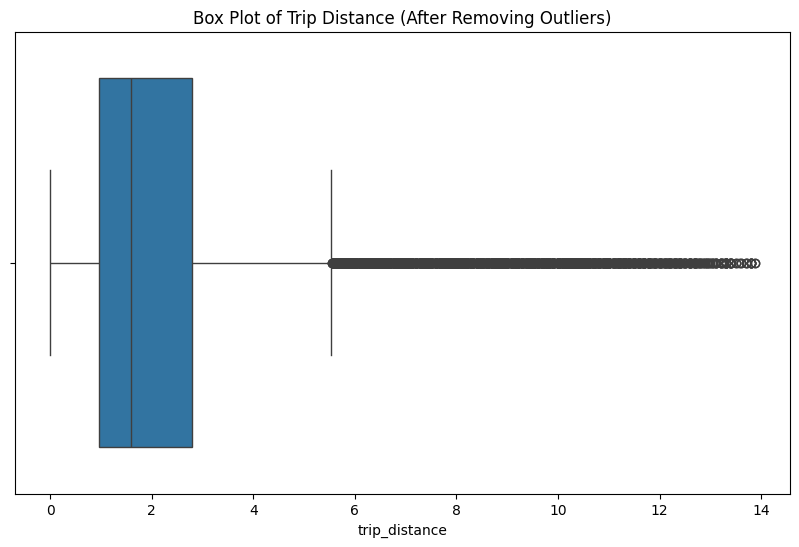

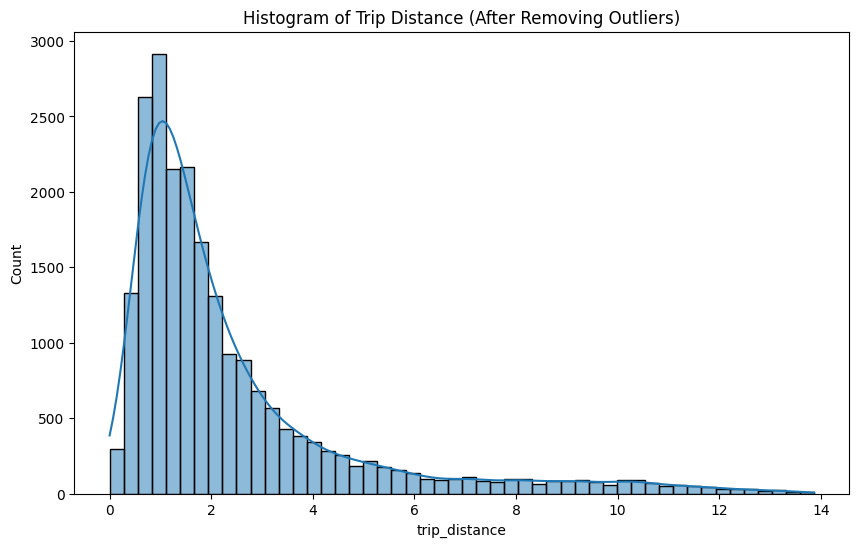

In [ ]:
# Verify changes
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['trip_distance'])
plt.title('Box Plot of Trip Distance (After Removing Outliers)')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['trip_distance'], bins=50, kde=True)
plt.title('Histogram of Trip Distance (After Removing Outliers)')
plt.show()





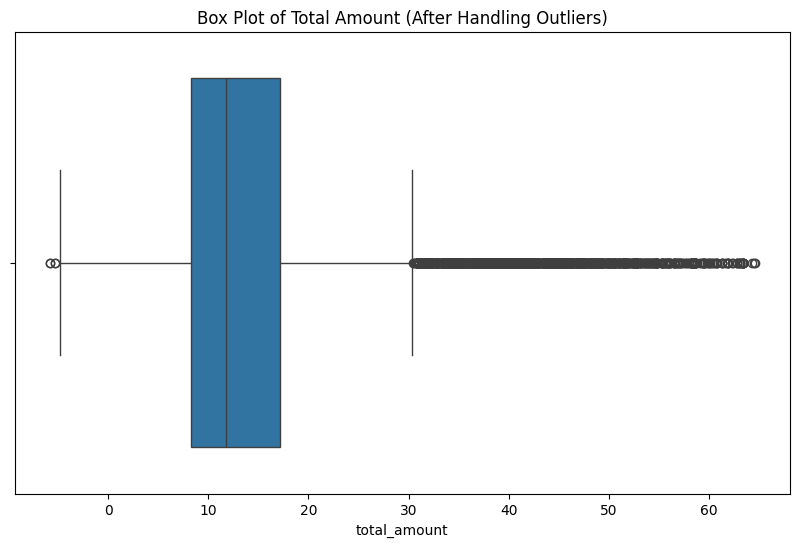

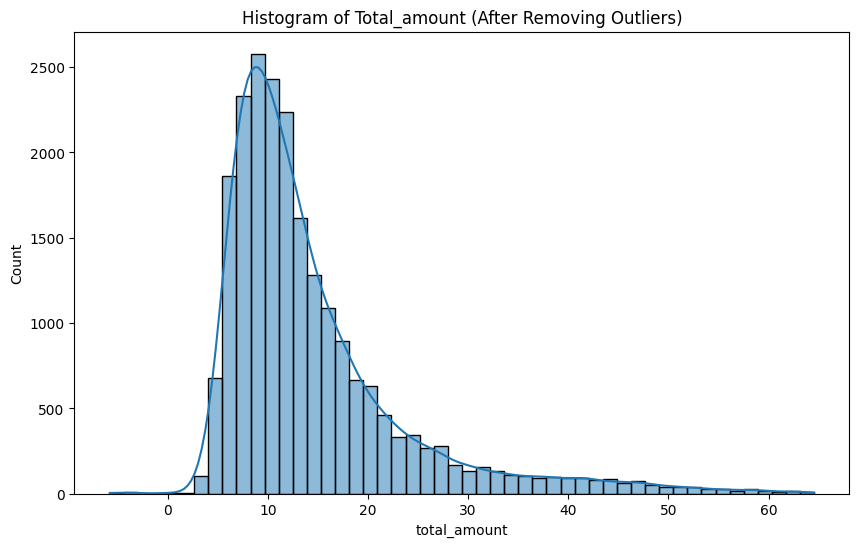

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['total_amount'])
plt.title('Box Plot of Total Amount (After Handling Outliers)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['total_amount'], bins=50, kde=True)
plt.title('Histogram of Total_amount (After Removing Outliers)')
plt.show()


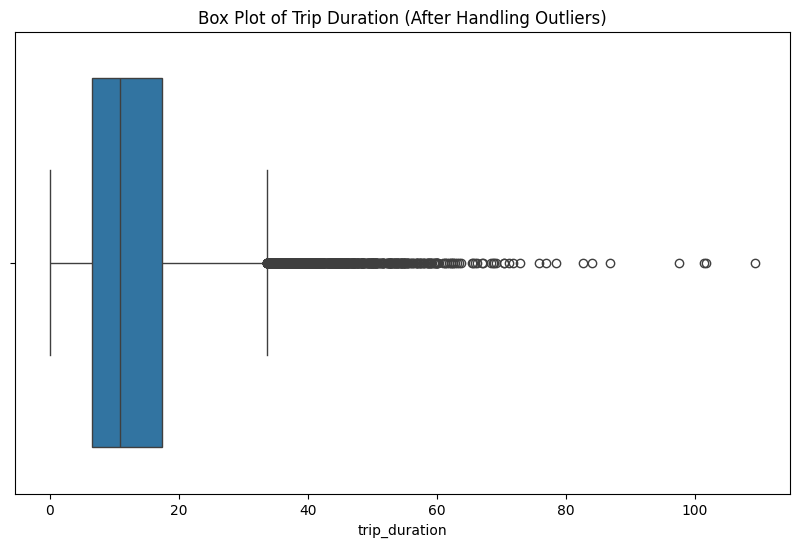

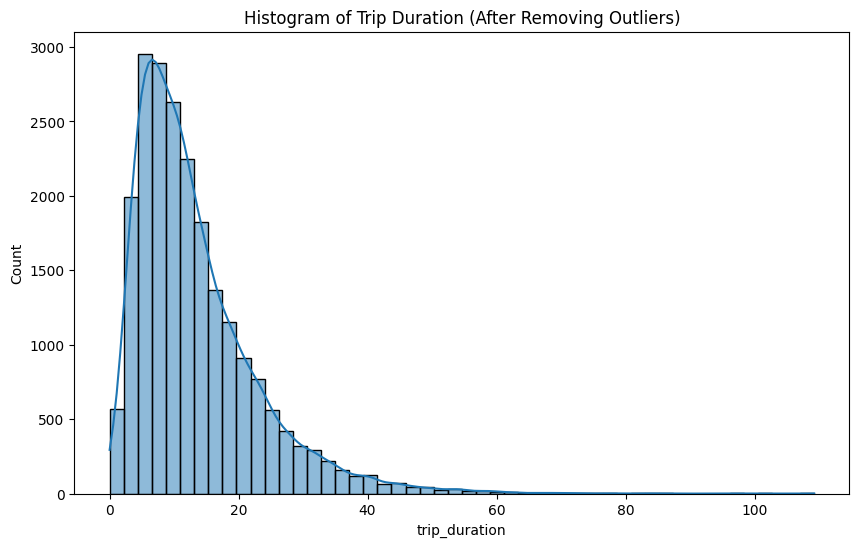

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['trip_duration'])
plt.title('Box Plot of Trip Duration (After Handling Outliers)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['trip_duration'], bins=50, kde=True)
plt.title('Histogram of Trip Duration (After Removing Outliers)')
plt.show()

### Comparison of EDA Before and After Removing Outliers

#### EDA Before Removing Outliers
In the initial exploratory data analysis (EDA) before removing outliers, several key patterns and trends were identified. Trip patterns showed clear peak hours with a noticeable spike in trip counts during late afternoon and evening hours. However, there was significant variance in trip duration during these peak hours, with some extreme outliers potentially distorting the average trip time. Fare patterns displayed a visible linear relationship between trip distance and fare, but outliers introduced extreme data points that could skew the overall analysis. When comparing vendors, differences were apparent, though outliers could exaggerate these differences.

Spatial analysis revealed dense clusters of pickup and drop-off locations in Manhattan, but some extreme outliers indicated potential data entry errors or unusual trips. The mean trip distance by drop-off location showed unusually high values for certain locations due to outliers. Revenue analysis demonstrated clear patterns, with higher rides and revenue on thursdays and fridays, though extreme outliers could inflate revenue figures. Similarly, monthly trends showed high ride counts and revenue during summer months, potentially influenced by outliers. Overall, significant outliers in trip distance, total amount, and trip duration were identified, indicating potential data entry errors, unusual trip conditions, or extreme traffic scenarios.

#### EDA After Removing Outliers
After removing outliers, the EDA provided a clearer and more accurate representation of the data. Trip patterns continued to show identifiable peak hours with a more consistent distribution of trip counts. The removal of outliers resulted in reduced variance in trip duration, offering a more accurate depiction of typical trip times. The linear relationship between trip distance and fare remained clear, with a more accurate trend line and reduced impact from extreme data points. Vendor comparisons still reflected differences, but these now mirrored typical fare patterns without distortion from outliers.

Spatial analysis became clearer, with high-demand areas in Manhattan more easily visualized without the distraction of extreme outliers. The mean trip distance by drop-off location provided more reliable data, giving a better understanding of typical trip patterns for different locations. Revenue analysis continued to show higher rides and revenue on thursdays and fridays, with more accurate revenue figures that better reflected typical rides. Monthly trends remained consistent, showing high ride counts and revenue during summer months without inflation from outliers. Overall, the removal of outliers effectively reduced their impact on the analysis, resulting in a more reliable dataset.

### Conclusion
By comparing the EDA before and after removing outliers, it is evident that the removal of outliers leads to a more accurate and reliable analysis. The presence of outliers can significantly distort key insights and trends, whereas their removal provides a clearer and more consistent representation of the data. This improved clarity helps in making better-informed decisions and understanding the typical patterns and behaviors in the taxi trip data.